In [1]:
import modules.io as io

In [2]:
DATA_KEY    = "TRAIN"
CONFIG_FILE = "./config/googlenet_c30_train300k_aug10_clean_point.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

5it [00:00, 42.68it/s]

centering images


231it [00:05, 41.01it/s]
100%|██████████| 126/126 [00:01<00:00, 75.88it/s]


In [4]:
import factories.model_factory as model_factory

model = model_factory.get(config)

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


pool 1 Tensor("googlenet/max_pool:0", shape=(?, 79, 79, 64), dtype=float32)
pool_2 Tensor("googlenet/max_pool_1:0", shape=(?, 39, 39, 192), dtype=float32)
pool 3 Tensor("googlenet/max_pool_2:0", shape=(?, 19, 19, 480), dtype=float32)
pool side Tensor("googlenet/avg_pool:0", shape=(?, 5, 5, 833), dtype=float32)
[None, 3200]
[None, 1024]
pool 5 Tensor("googlenet/max_pool_3:0", shape=(?, 9, 9, 833), dtype=float32)
pool final Tensor("googlenet/avg_pool_1:0", shape=(?, 3, 3, 1024), dtype=float32)
[None, 9216]
[None, 1024]
Tensor("googlenet/output/Identity:0", shape=(?, 30), dtype=float32)
Tensor("googlenet/side_output/Identity:0", shape=(?, 30), dtype=float32)


In [5]:
import factories.preprocessor_factory as prepro_factory

preprocessor = prepro_factory.get(config)

/home/marsdenlab/projects/seg_regression/components/common.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/marsdenlab/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/marsdenlab/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/marsdenlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/marsdenlab/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/marsdenlab/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, i

In [6]:
import factories.trainer_factory as trainer_factory

trainer = trainer_factory.get(config)

trainer.setup_directories()

In [7]:
trainer.set_data(data, DATA_KEY)
trainer.set_preprocessor(preprocessor)

In [8]:
trainer.set_model(model)

(126, 160, 160)
(126, 160, 160, 1)
(126, 30)
0: loss=0.13630636036396027

yhat = [0.5096493  0.5039359  0.4747259  0.45967644 0.4491482  0.4550603
 0.45009157 0.4543135  0.45734724 0.45394385 0.46428424 0.46309313
 0.45112053 0.44965312 0.45629036 0.45707646 0.4752972  0.47629866
 0.44005507 0.47756627 0.46669814 0.45068198 0.4479328  0.44983116
 0.46152407 0.478162   0.45409    0.48162815 0.46087506 0.44724083]


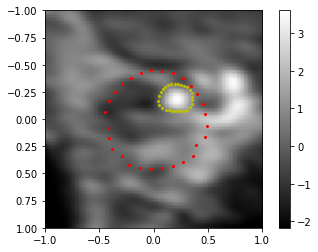

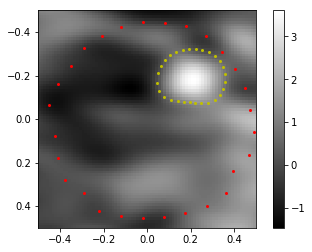

0: loss=0.14309221506118774

yhat = [0.51129234 0.5034125  0.4854361  0.4678178  0.4595647  0.46119228
 0.46220654 0.46317643 0.46780384 0.46214733 0.47207913 0.47075668
 0.4625771  0.46034467 0.46736276 0.46630692 0.48212808 0.47701314
 0.45302922 0.48024294 0.48014036 0.46451342 0.46225664 0.45810506
 0.4632082  0.47590467 0.4640648  0.4843145  0.46905974 0.4659791 ]


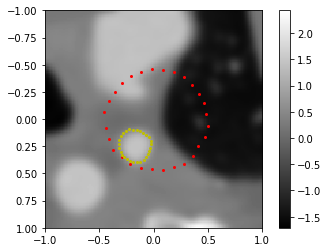

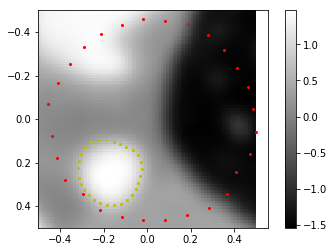

100: loss=0.0035019787028431892

yhat = [0.60647106 0.48415595 0.1386806  0.13781899 0.13545689 0.13119042
 0.13725476 0.12844302 0.13349518 0.13188563 0.13394177 0.1338709
 0.13439521 0.13302752 0.13267095 0.1376365  0.14051919 0.14157806
 0.14120616 0.14222746 0.1365796  0.13548486 0.13266306 0.12682565
 0.13127276 0.13354993 0.13254367 0.1374558  0.14190748 0.13632463]


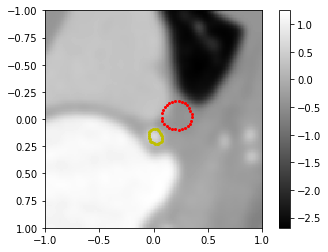

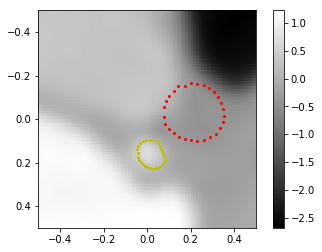

100: loss=0.0023745244834572077

yhat = [0.6098041  0.47130537 0.13890518 0.13768595 0.13709533 0.1350583
 0.14331777 0.13020998 0.1342936  0.13611212 0.13496087 0.13155374
 0.13835588 0.1362625  0.13420302 0.13514447 0.14457995 0.14456132
 0.1419191  0.14556538 0.1394702  0.13287808 0.13191125 0.12842031
 0.13854596 0.13638294 0.1338375  0.13906501 0.13919461 0.13896325]


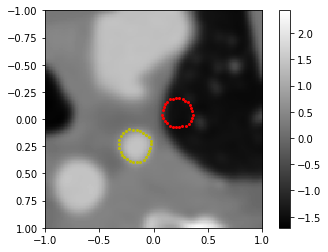

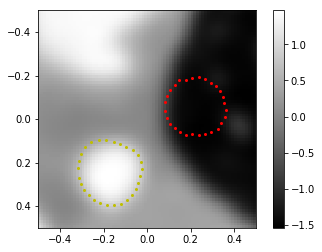

200: loss=0.0035645950119942427

yhat = [0.5718099  0.47971943 0.09704795 0.09833875 0.0984014  0.09811459
 0.0993468  0.09471489 0.09731817 0.09160383 0.09494346 0.09171064
 0.09833686 0.09815981 0.09405978 0.09736326 0.10022634 0.10139368
 0.09805313 0.09911524 0.09681882 0.09112332 0.09163292 0.09256024
 0.09427822 0.09630211 0.09119131 0.10015932 0.09538563 0.09772023]


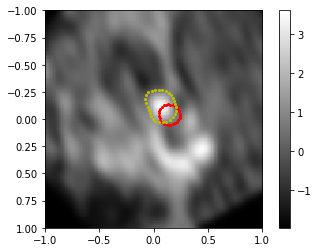

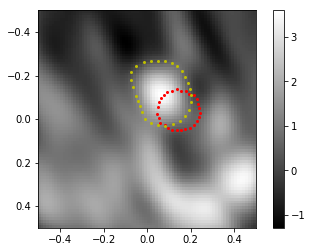

200: loss=0.004548263736069202

yhat = [0.5640045  0.50046486 0.09161474 0.09177938 0.09475704 0.09210313
 0.09381137 0.08547698 0.08845942 0.08550069 0.08798627 0.08539771
 0.09192917 0.09093246 0.09075681 0.09008721 0.09484693 0.09557298
 0.09276151 0.09364077 0.09298887 0.08506244 0.085267   0.08446135
 0.08912887 0.09144094 0.08403971 0.09435651 0.08889931 0.0905211 ]


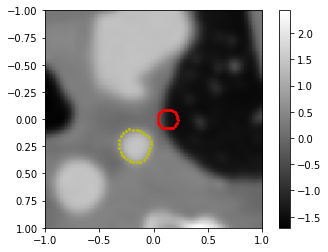

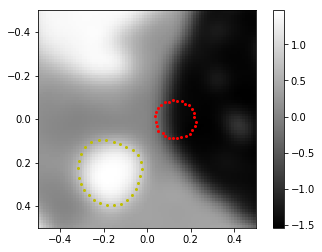

300: loss=0.008433608338236809

yhat = [0.5063753  0.44723657 0.12165546 0.12612519 0.12814733 0.12941307
 0.1253113  0.12634711 0.12508997 0.12485048 0.12313773 0.12467742
 0.12328944 0.12392467 0.12242053 0.1212159  0.12185049 0.12520844
 0.12555444 0.13073094 0.12972291 0.13060975 0.12805702 0.12599714
 0.12737831 0.12342981 0.12153753 0.12623826 0.12501875 0.12336081]


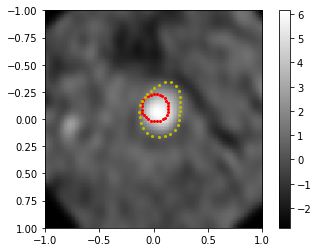

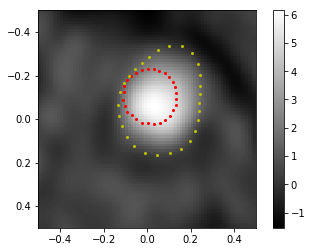

300: loss=0.0025999234057962894

yhat = [0.4796476  0.457546   0.10672598 0.10912174 0.10951295 0.10715736
 0.1077705  0.10974894 0.1092682  0.10712267 0.10646109 0.10892452
 0.10713558 0.10548259 0.10234176 0.10561206 0.10390203 0.10410249
 0.10702561 0.10988812 0.11334078 0.11328083 0.11008529 0.10993099
 0.10729666 0.10587083 0.10297839 0.10581667 0.10610168 0.1076221 ]


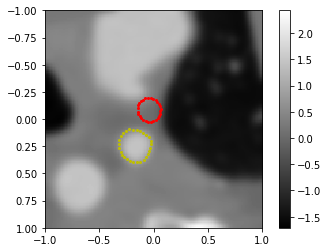

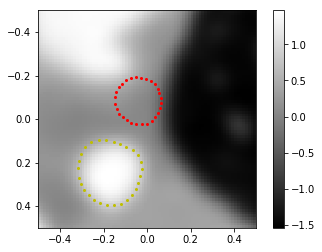

400: loss=0.0014099723193794489

yhat = [0.50114626 0.52825236 0.13496782 0.13000605 0.1343284  0.13290761
 0.13319924 0.13464135 0.13152356 0.13303535 0.13202636 0.13385917
 0.13316266 0.13428949 0.136244   0.13637303 0.13723582 0.13689633
 0.13486093 0.13811333 0.13764876 0.12779793 0.13457671 0.13144231
 0.13367893 0.13507636 0.13381156 0.13654138 0.13491115 0.1340194 ]


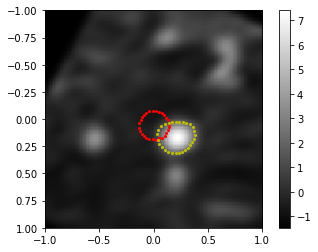

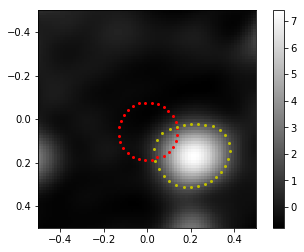

400: loss=0.002428179606795311

yhat = [0.5008962  0.5130935  0.11585262 0.11465604 0.11821713 0.1152561
 0.1177025  0.11621133 0.11515825 0.11373098 0.11672358 0.11639185
 0.11471243 0.11472763 0.11712424 0.11813989 0.12050647 0.11868984
 0.11551904 0.12091705 0.12028491 0.11298239 0.11883963 0.11316521
 0.11703377 0.11582619 0.11523215 0.12095395 0.11793422 0.11550885]


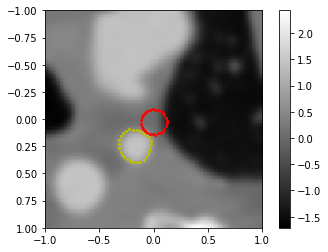

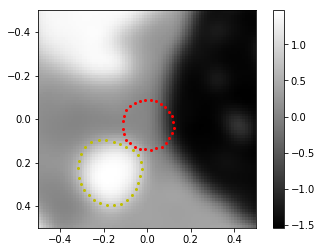

500: loss=0.0012874933890998363

yhat = [0.47998756 0.46856362 0.09257065 0.09446518 0.09174504 0.09145599
 0.08965307 0.08791925 0.0887165  0.08753272 0.09043242 0.09179448
 0.09537038 0.09386314 0.09537069 0.09016539 0.08921653 0.0895408
 0.08887777 0.08674938 0.09072048 0.09311449 0.08988307 0.09006871
 0.08804906 0.09205569 0.09250034 0.0956106  0.09729439 0.09599805]


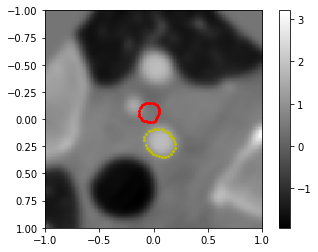

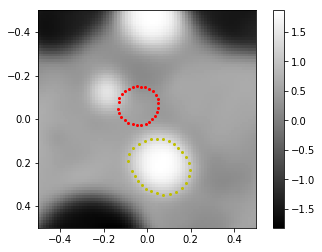

500: loss=0.0020688099320977926

yhat = [0.45443606 0.4787784  0.11125239 0.11097337 0.1077299  0.10769469
 0.102196   0.10338267 0.1054379  0.10382394 0.10490422 0.10880482
 0.10813558 0.11254808 0.11124027 0.10778514 0.10267528 0.10414086
 0.1040576  0.10555235 0.10758326 0.1074888  0.1033956  0.10672873
 0.10381143 0.10961229 0.10973435 0.1104155  0.11381514 0.11075888]


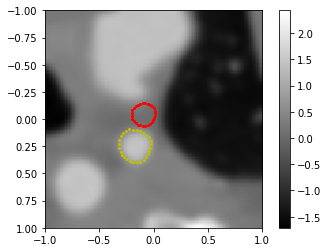

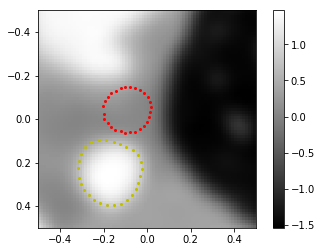

600: loss=0.0016115119215101004

yhat = [0.48744446 0.45962003 0.13675185 0.1368086  0.138414   0.14070989
 0.14029723 0.13762856 0.13292219 0.12944062 0.13127992 0.13086253
 0.13252218 0.13549967 0.13728553 0.13954495 0.14259237 0.14325495
 0.14164092 0.13936615 0.13399929 0.13348591 0.13034356 0.13419046
 0.13320504 0.13503146 0.1374346  0.13862175 0.13438058 0.13474073]


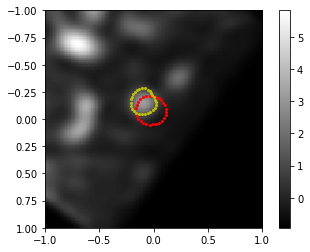

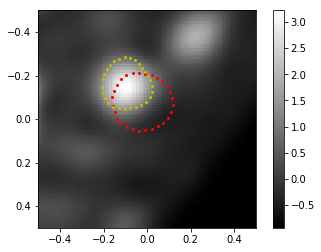

600: loss=0.0024513767566531897

yhat = [0.47177258 0.46676219 0.12287775 0.12267697 0.12471096 0.1273218
 0.12485647 0.12195717 0.11951432 0.11750333 0.11825246 0.11632031
 0.11997705 0.12308272 0.12608835 0.12717749 0.12572098 0.1279418
 0.12684378 0.12370995 0.12215955 0.12012799 0.11856777 0.11988126
 0.11834006 0.12309423 0.1247925  0.12367307 0.12218078 0.12429471]


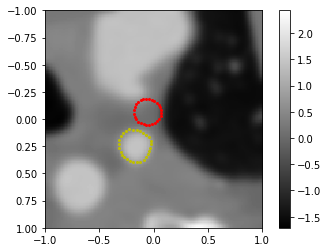

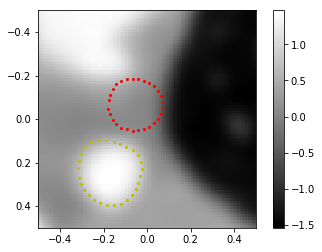

In [ ]:
trainer.train()

In [ ]:
trainer.save()